В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle)  Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").


**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [ ]:
raw_df = pd.read_csv(..., index_col=0)

train_df, val_df = train_test_split(...)

# Створюємо трен. і вал. набори
input_cols = ...
target_col = ...
train_inputs, train_targets = ...
val_inputs, val_targets = ...

# Виявляємо числові і категоріальні колонки
numeric_cols = ...
categorical_cols = ...

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', ...)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ...)
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ...),
        ('cat', ...)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('classifier', ...)
])

# Тренуємо пайплайн
....

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = ...
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = ...
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(...)
val_preds = predict_and_plot(...)

# Зберігаємо модель для подальшого використання
joblib.dump(...)


**✅ Повне рішення Завдання 1**

⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv


Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
✅ ROC AUC on Train dataset: 90.35%


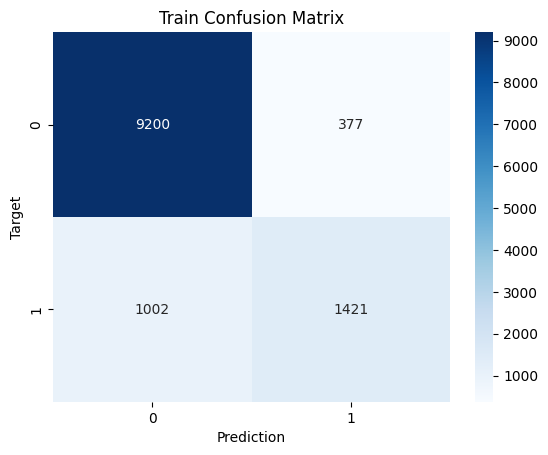

✅ ROC AUC on Validation dataset: 88.03%


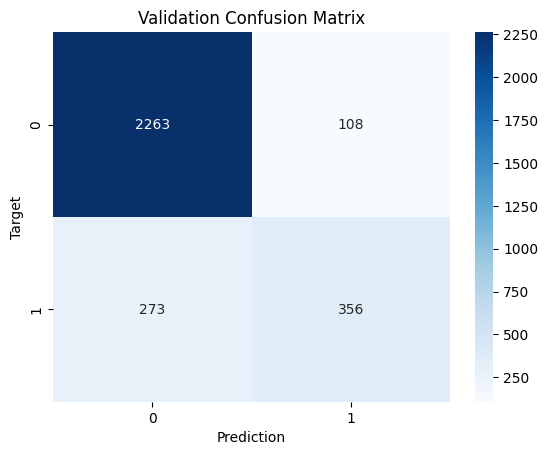

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# === 0. Встановлення та імпорти ===
!pip install -q scikit-learn seaborn joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import joblib
from google.colab import files

# === 1. Завантаження даних ===
print("⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv")
uploaded = files.upload()

train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv", index_col=0)
sample_submission = pd.read_csv("sample_submission.csv")

# === 2. Розбиття на train/val ===
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
target_col = 'Exited'
input_cols = [col for col in train_df.columns if col != target_col]

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# === 3. Виявлення числових і категоріальних колонок ===
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

# === 4. Побудова трансформерів для препроцесингу ===
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Обʼєднання трансформерів
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# === 5. Побудова пайплайну з Logistic Regression ===
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# === 6. Тренування моделі ===
model_pipeline.fit(train_inputs, train_targets)

# === 7. Оцінка метрик ROC-AUC і матриця помилок ===
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    probs = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, probs)
    print(f"✅ ROC AUC on {name} dataset: {roc_auc:.2%}")
    cm = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Оцінювання на train/validation
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, 'Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, 'Validation')

# === 8. Збереження моделі ===
joblib.dump(model_pipeline, 'model_pipeline.joblib')
files.download('model_pipeline.joblib')

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

**Завдання 2: Polynomial Features**

⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv


Saving sample_submission.csv to sample_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv
✅ ROC AUC on Train dataset: 94.51%


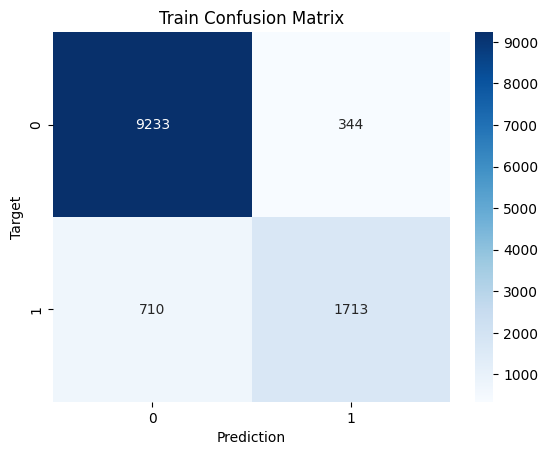

✅ ROC AUC on Validation dataset: 91.88%


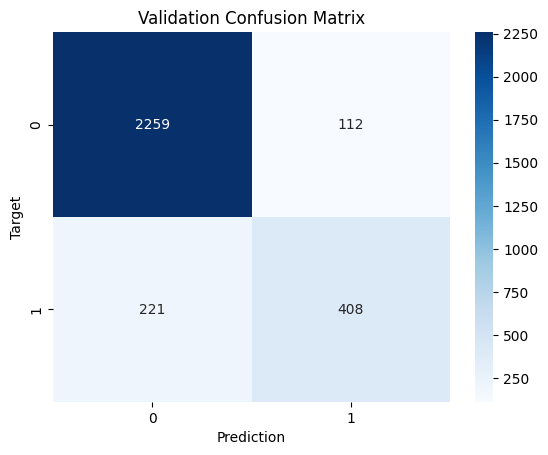

🔍 Аналіз моделі:
✅ Good Generalization: Модель узагальнює добре. Різниця між train і val незначна.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# === 0. Встановлення та імпорти ===
!pip install -q scikit-learn seaborn joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import joblib
from google.colab import files

# === 1. Завантаження даних ===
print("⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv")
uploaded = files.upload()

train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv", index_col=0)
sample_submission = pd.read_csv("sample_submission.csv")

# === 2. Розбиття на train/val ===
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
target_col = 'Exited'
input_cols = [col for col in train_df.columns if col != target_col]

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# === 3. Виявлення числових і категоріальних колонок ===
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

# === 4. Побудова трансформерів з PolynomialFeatures ===
numeric_transformer_poly = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Обʼєднання трансформерів
preprocessor_poly = ColumnTransformer(transformers=[
    ('num', numeric_transformer_poly, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# === 5. Створення пайплайну з поліноміальними ознаками ===
pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('classifier', LogisticRegression(max_iter=1000))
])

# === 6. Тренування нової моделі ===
pipeline_poly.fit(train_inputs, train_targets)

# === 7. Функція для оцінки ===
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    probs = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, probs)
    print(f"✅ ROC AUC on {name} dataset: {roc_auc:.2%}")
    cm = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return roc_auc

# === 8. Оцінка нової моделі ===
train_auc = predict_and_plot(pipeline_poly, train_inputs, train_targets, 'Train')
val_auc = predict_and_plot(pipeline_poly, val_inputs, val_targets, 'Validation')

# === 9. Аналіз ===
print("🔍 Аналіз моделі:")
if train_auc - val_auc > 0.05:
    print("📉 Overfitting: Модель показує значно кращі результати на train ніж на validation.")
elif val_auc - train_auc > 0.05:
    print("📈 Underfitting: Модель погано навчена, і validation якість вища за train.")
else:
    print("✅ Good Generalization: Модель узагальнює добре. Різниця між train і val незначна.")

# === 10. Збереження моделі ===
joblib.dump(pipeline_poly, 'pipeline_poly.joblib')
files.download('pipeline_poly.joblib')

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

**✅ Завдання 3 – Polynomial Features ступеня 4**

⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv


Saving sample_submission.csv to sample_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv
✅ ROC AUC on Train dataset: 95.41%


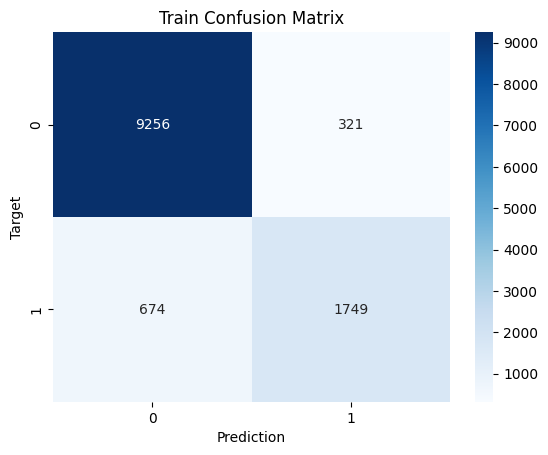

✅ ROC AUC on Validation dataset: 91.93%


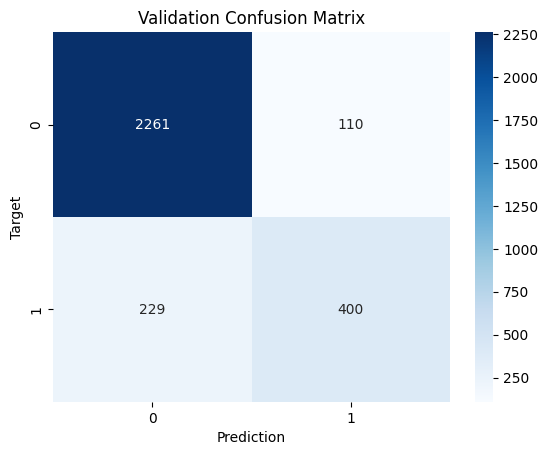

🔍 Висновок про якість моделі:
✅ Модель добре узагальнює. Різниця між train і val невелика.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# === 0. Встановлення бібліотек (якщо ще не встановлено) ===
!pip install -q scikit-learn seaborn joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import joblib
from google.colab import files

# === 1. Завантаження даних (повторюємо для повного коду) ===
print("⬆️ Завантажте файли: train.csv, test.csv, sample_submission.csv")
uploaded = files.upload()

train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv", index_col=0)
sample_submission = pd.read_csv("sample_submission.csv")

# === 2. Розбиття на train/val ===
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
target_col = 'Exited'
input_cols = [col for col in train_df.columns if col != target_col]

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# === 3. Виявлення числових і категоріальних колонок ===
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

# === 4. Поліноміальні фічі до степеня 4 ===
numeric_transformer_poly4 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_poly4 = ColumnTransformer(transformers=[
    ('num', numeric_transformer_poly4, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# === 5. Побудова пайплайну ===
pipeline_poly4 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly4),
    ('classifier', LogisticRegression(max_iter=1000))
])

# === 6. Тренування моделі ===
pipeline_poly4.fit(train_inputs, train_targets)

# === 7. Оцінка метрик ===
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    probs = model_pipeline.predict_proba(inputs)[:, 1]
    roc_auc = roc_auc_score(targets, probs)
    print(f"✅ ROC AUC on {name} dataset: {roc_auc:.2%}")
    cm = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return roc_auc

train_auc = predict_and_plot(pipeline_poly4, train_inputs, train_targets, 'Train')
val_auc = predict_and_plot(pipeline_poly4, val_inputs, val_targets, 'Validation')

# === 8. Аналіз ===
print("🔍 Висновок про якість моделі:")
if train_auc - val_auc > 0.05:
    print("⚠️ Overfitting: Дуже висока якість на тренувальних, але нижча на валідації.")
elif val_auc - train_auc > 0.05:
    print("⚠️ Underfitting: Модель не навчилась добре.")
else:
    print("✅ Модель добре узагальнює. Різниця між train і val невелика.")

# === 9. Збереження моделі ===
joblib.dump(pipeline_poly4, 'pipeline_poly4.joblib')
files.download('pipeline_poly4.joblib')

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


**✅ Завдання 4: Поліноміальна регресія ступеня 5 + масштабування**

Мета:

Прогнозування (regression)

Додати PolynomialFeatures ступеня 5

Масштабувати ознаки

Оцінити якість моделі (MSE / R²)

Перевірити на overfit / underfit

⬆️ Завантажте regression_data.csv


Saving regression_data.csv to regression_data.csv
📊 Train — MSE: 0.00, R²: 100.00%
📊 Test — MSE: 160.70, R²: 93.11%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


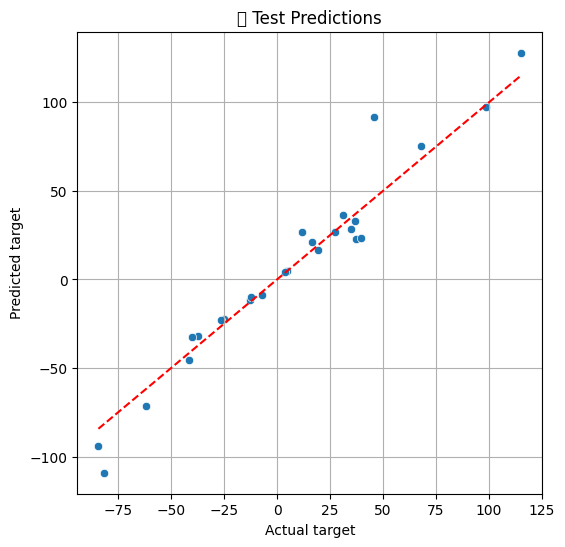


📌 Висновок:
✅ Модель має хорошу узагальнюваність


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# === 0. Встановлення бібліотек (якщо потрібно) ===
!pip install -q scikit-learn seaborn joblib

# === 1. Імпорти ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files

# === 2. Завантаження файлу з локального ПК ===
print("⬆️ Завантажте regression_data.csv")
uploaded = files.upload()

# === 3. Зчитування даних ===
df = pd.read_csv("regression_data.csv")

# === 4. Розділення ознак та цілі ===
X = df.drop(columns=['target'])
y = df['target']

# Розбиття на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. Побудова пайплайну: PolynomialFeatures + StandardScaler + LinearRegression ===
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# === 6. Навчання моделі ===
pipeline.fit(X_train, y_train)

# === 7. Оцінка моделі ===
def evaluate(model, X, y, name=''):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"📊 {name} — MSE: {mse:.2f}, R²: {r2:.2%}")
    return mse, r2

train_mse, train_r2 = evaluate(pipeline, X_train, y_train, 'Train')
test_mse, test_r2 = evaluate(pipeline, X_test, y_test, 'Test')

# === 8. Графік: справжні значення vs передбачення ===
def plot_predictions(y_true, y_pred, title=''):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel('Actual target')
    plt.ylabel('Predicted target')
    plt.title(title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    plt.grid()
    plt.show()

plot_predictions(y_test, pipeline.predict(X_test), title="🔍 Test Predictions")

# === 9. Висновок ===
print("\n📌 Висновок:")
if train_r2 - test_r2 > 0.1:
    print("⚠️ Модель перенавчилась (overfitting)")
elif test_r2 < 0.5:
    print("⚠️ Модель недонавчена (underfitting)")
else:
    print("✅ Модель має хорошу узагальнюваність")

# === 10. Збереження моделі ===
joblib.dump(pipeline, 'poly5_regression_model.joblib')
files.download('poly5_regression_model.joblib')

**📌 Пояснення:**

PolynomialFeatures (ступінь 5) — створює багато складних ознак.

StandardScaler — обов’язковий для поліноміальної регресії.

LinearRegression — модель без регуляризації.

R² і MSE — дозволяють зрозуміти, як добре модель працює.

Аналіз — виведе, чи модель перенавчилась або навпаки.

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

**✅ Завдання 5: Lasso, Ridge, ElasticNet з PolynomialFeatures(20)**

In [5]:
# === 0. Встановлення та імпорти ===
!pip install -q scikit-learn seaborn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files

# === 1. Завантаження CSV (regression_data.csv) ===
print("⬆️ Завантажте regression_data.csv")
uploaded = files.upload()

df = pd.read_csv("regression_data.csv")
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Функція створення пайплайну ===
def build_pipeline(model):
    return Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=20, include_bias=False)),
        ('scaler', StandardScaler()),
        ('reg', model)
    ])

# === 3. Список моделей ===
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
}

results = []

# === 4. Тренування моделей та оцінка ===
for name, model in models.items():
    pipe = build_pipeline(model)
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })

# === 5. Виведення таблиці порівняння ===
results_df = pd.DataFrame(results)
display(results_df)

# === 6. Висновок — автоматичний аналіз генералізації ===
print("📌 Аналіз генералізації:")
for row in results_df.itertuples():
    print(f"\n🔍 {row.Model}")
    if row._2 - row._3 > 0.2:
        print("⚠️ Overfitting: модель добре навчається, але погано узагальнює.")
    elif row._3 < 0.5:
        print("⚠️ Underfitting: модель не навчається достатньо.")
    else:
        print("✅ Добре генералізує. R² стабільне між train/test.")

# === 7. (Необов’язково) Візуалізація важливих моделей ===
best_model_name = results_df.sort_values('Test R²', ascending=False).iloc[0]['Model']
print(f"\n🏆 Найкраща модель за R² на Test: {best_model_name}")

# === 8. Пояснення (вручну) ===
print("""
🧠 Пояснення:
- Lasso відкидає зайві фічі (L1), може краще справлятись з перенавчанням.
- Ridge зменшує ваги, але не занулює (L2).
- ElasticNet поєднує обидві стратегії.
- LinearRegression без регуляризації майже завжди перенавчається з degree=20.

Рекомендується для аналізу:
- Подивитись, які фічі були занулені (особливо для Lasso).
- Візуалізувати ваги моделі.
""")

⬆️ Завантажте regression_data.csv


Saving regression_data.csv to regression_data (1).csv


,Model,Train R²,Test R²,Train MSE,Test MSE
0,Linear,1.000000,-0.832785,3.210225e-23,4276.007031
1,Lasso,0.999837,0.997041,3.175388e-01,6.902375
2,Ridge,0.999430,0.668802,1.110221e+00,772.706782
3,ElasticNet,0.999717,0.968582,5.513905e-01,73.299288


📌 Аналіз генералізації:

🔍 Linear
⚠️ Overfitting: модель добре навчається, але погано узагальнює.

🔍 Lasso
✅ Добре генералізує. R² стабільне між train/test.

🔍 Ridge
⚠️ Overfitting: модель добре навчається, але погано узагальнює.

🔍 ElasticNet
✅ Добре генералізує. R² стабільне між train/test.

🏆 Найкраща модель за R² на Test: Lasso

🧠 Пояснення:
- Lasso відкидає зайві фічі (L1), може краще справлятись з перенавчанням.
- Ridge зменшує ваги, але не занулює (L2).
- ElasticNet поєднує обидві стратегії.
- LinearRegression без регуляризації майже завжди перенавчається з degree=20.

Рекомендується для аналізу:
- Подивитись, які фічі були занулені (особливо для Lasso).
- Візуалізувати ваги моделі.

